In [61]:
from importlib import reload
import time
import joblib
from pylab import *
from tqdm import tqdm


import sys
sys.path.append("..")

from helper_basic import *
import helper_basic as hp
import helper_finetime as hpt
import helper_visa as vs

import config
reload(vs)



<module 'helper_visa' from '/home/mathusla/tofpet/Mu-Hardware/Keysight/../helper_visa.py'>

# Step 1: connect to the scope
- If you don't know the address, do vs.connect()
- Otherwise, put the address in the argument will speed it up

In [63]:
path = config.scope
scope = vs.connect(address = "TCPIP0::192.168.1.23::inst0::INSTR", timeout=30_000) # set 30 second

Connected to VISA [TCPIP0::192.168.1.23::inst0::INSTR]:  KEYSIGHT TECHNOLOGIES,EXR054A,MY63160110,11.50.00201



# Example 1: read the current waveform from the scope

- For simplicity of the code and better readout speed, please configure the trigger threshold and channel setup on the scope

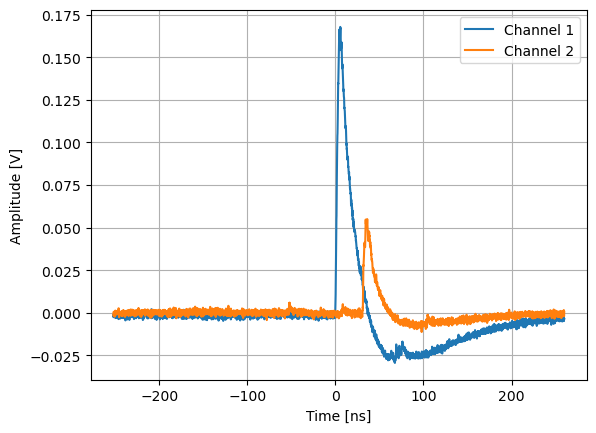

In [89]:
trigger_channel = 3
read_channel = [1,2,3]
acquire_length = 4096

# data,time_series=read_waveform_cuts(scope, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True, initialize = True, calibration_data=None)
data,time_series=vs.read_waveform(scope, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True, initialize = True, calibration_data=None)

for ch in read_channel[0:2]:
    plot(time_series*1e9, data[ch], label=f"Channel {ch}")

# xlim(-1,10)
xlabel("Time [ns]")
ylabel("Amplitude [V]")
legend()
grid()

# Example 2: repetitively read multiple waveforms from the scope

- For simplicity of the code and better readout speed, please configure the trigger threshold and channel setup on the scope

In [101]:
reload(vs)

<module 'helper_visa' from '/home/mathusla/tofpet/Mu-Hardware/Keysight/../helper_visa.py'>

10/100 events acquired, time elapsed 0.3 s, time from last print 0.3 s
20/100 events acquired, time elapsed 0.6 s, time from last print 0.3 s
30/100 events acquired, time elapsed 0.9 s, time from last print 0.3 s
40/100 events acquired, time elapsed 1.1 s, time from last print 0.3 s
50/100 events acquired, time elapsed 1.4 s, time from last print 0.3 s
60/100 events acquired, time elapsed 1.7 s, time from last print 0.3 s
70/100 events acquired, time elapsed 2.0 s, time from last print 0.3 s
80/100 events acquired, time elapsed 2.2 s, time from last print 0.2 s
90/100 events acquired, time elapsed 2.5 s, time from last print 0.3 s
100/100 events acquired, time elapsed 2.9 s, time from last print 0.5 s


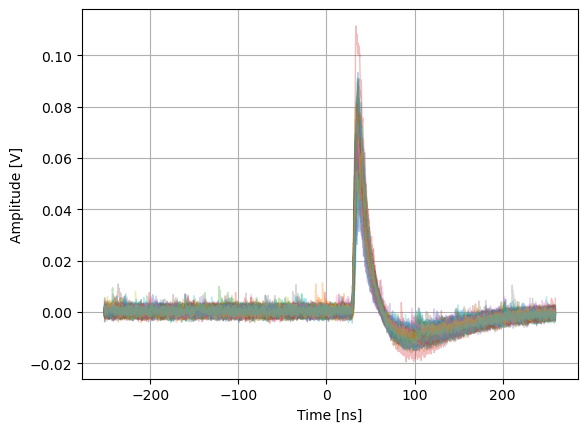

In [102]:
data_save = vs.get_events(scope, Nevents = 100, print_every_n = 10, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
# data_save = get_events_cuts(scope, Nevents = 40, print_every_n = 4, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
time_series = data_save["metadata"]["time_series"]*1e9

ch=2
for i in range(len(data_save[ch])):
    plot(time_series, data_save[ch][i],alpha=0.3, linewidth=1)

# xlim(-10,10)
xlabel("Time [ns]")
ylabel("Amplitude [V]")
grid()

# Acquire the data

In [129]:
data_save = vs.get_events(scope, Nevents = 1000, print_every_n = 100, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
joblib.dump(data_save, config.scope+"fiber_attenuation_bcf92xl/attenuation_.joblib",compress =False) # Dark current on CH1 and CH2, threshold CH1=1 mV 0.5 eh

100/1000 events acquired, time elapsed 2.9 s, time from last print 2.9 s
200/1000 events acquired, time elapsed 5.8 s, time from last print 2.9 s
300/1000 events acquired, time elapsed 8.6 s, time from last print 2.8 s
400/1000 events acquired, time elapsed 11.5 s, time from last print 2.9 s
500/1000 events acquired, time elapsed 14.3 s, time from last print 2.7 s
600/1000 events acquired, time elapsed 17.3 s, time from last print 3.0 s
700/1000 events acquired, time elapsed 20.1 s, time from last print 2.8 s
800/1000 events acquired, time elapsed 23.0 s, time from last print 2.9 s
900/1000 events acquired, time elapsed 25.9 s, time from last print 2.9 s
1000/1000 events acquired, time elapsed 28.8 s, time from last print 2.9 s


['/mnt/sda2//scope_data/fiber_attenuation_bcf92xl/attenuation_9.joblib']